In [ ]:
# pip install scikit-learn 
# pip install pandas
# pip install matplotlib

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import numpy as np
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Load the flight data from the database
link_flights = "files/limpios2023.csv"
flight_data = pd.read_csv(link_flights) 

In [ ]:
flight_data

In [ ]:
# Preprocess the data
flight_data['STD'] = pd.to_datetime(flight_data['STD'])  # Convert flight_date to datetime
flight_data['STA'] = pd.to_datetime(flight_data['STA'])  # Convert booking_date to datetime

In [ ]:
flight_data

In [43]:
# Split the data into training and testing sets

bookings = flight_data['Bookings']  # Input feature
passengers = flight_data['Passengers']  # Target variable

In [63]:

# Split the data into training and testing sets

bookings_train, bookings_test, passengers_train, passengers_test = train_test_split(bookings, passengers, test_size=0.2, random_state=42)

# Train the linear regression model
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(bookings_train.values.reshape(-1, 1), passengers_train)

# Make predictions on the test set
predicted_passengers = modelo_sklearn.predict(bookings_test.values.reshape(-1, 1))

# Calculate R-squared (coefficient of determination)
r2 = r2_score(passengers_test, predicted_passengers)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(passengers_test, predicted_passengers)

# Calculate Mean Squared Residual (MSR) or Mean Squared Aperture (MSA)
# Assuming no specific model for calculating MSA is provided:
# We can estimate MSA as the variance of the residuals (errors)
residuals = passengers_test - predicted_passengers
msa = residuals.var()

# Print the results
print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Squared Aperture (MSA):", msa)



R-squared: 0.5369852133975054
Mean Squared Error (MSE): 651.7353792058932
Mean Squared Aperture (MSA): 651.7428674181181


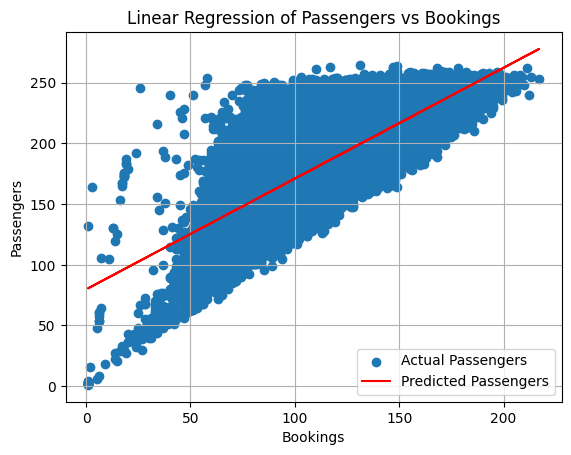

In [64]:
#Create a scatter plot for visualization

plt.scatter(bookings_test, passengers_test, label='Actual Passengers')
plt.plot(bookings_test, predicted_passengers, color='red', label='Predicted Passengers')
plt.xlabel('Bookings')
plt.ylabel('Passengers')
plt.title('Linear Regression of Passengers vs Bookings')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Load the flight data from the database
link_flights = "files/limpios2023.csv"
flight_data = pd.read_csv(link_flights) 

# Preprocess the data
flight_data['STD'] = pd.to_datetime(flight_data['STD'])  # Convert STD to datetime
flight_data['STA'] = pd.to_datetime(flight_data['STA'])  # Convert STA to datetime

# Extract month from STA
flight_data['STA'] = flight_data['STA'].dt.month

#Modelo de regresion multiple donde "x" esta en booking y en STA pero solo el mes, y la "y" es passengers
# Seleccionar las columnas de entrada y salida
X = flight_data[['Bookings', 'STA']]
y = flight_data['Passengers']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_sklearn.predict(X_test)

# Calcular R-cuadrado (coeficiente de determinación)
r2 = r2_score(y_test, y_pred)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el error cuadrático medio residual (MSR) o el error cuadrático medio de apertura (MSA)
# Suponiendo que no se proporciona un modelo específico para calcular MSA:
# Podemos estimar MSA como la varianza de los residuos (errores)
residuos = y_test - y_pred
msa = residuos.var()

# Imprimir los resultados
print("R-cuadrado:", r2)
print("Error cuadrático medio (MSE):", mse)




R-cuadrado: 0.5391245539234808
Error cuadrático medio (MSE): 648.7240630464718


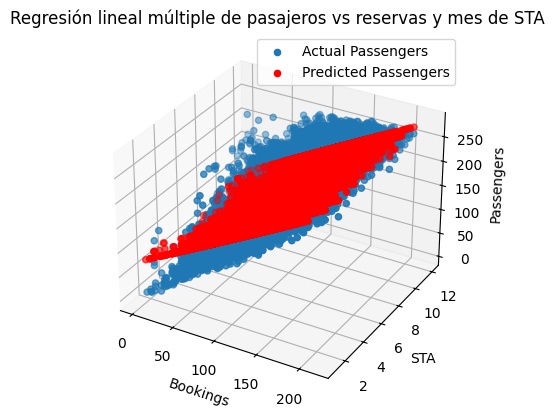

In [9]:
#ploteo de la regresion multiple
# Crear un gráfico de dispersión para visualización
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['Bookings'], X_test['STA'], y_test, label='Actual Passengers')
ax.scatter(X_test['Bookings'], X_test['STA'], y_pred, color='red', label='Predicted Passengers')
ax.set_xlabel('Bookings')
ax.set_ylabel('STA')
ax.set_zlabel('Passengers')
plt.title('Regresión lineal múltiple de pasajeros vs reservas y mes de STA')
plt.legend()
plt.show()

In [11]:
# Preprocesar los datos
flight_data['STD'] = pd.to_datetime(flight_data['STD'])  # Convertir STD a datetime
flight_data['STA'] = pd.to_datetime(flight_data['STA'])  # Convertir STA a datetime
flight_data['DayOfWeek'] = flight_data['STA'].dt.dayofweek  # Extraer el día de la semana de STA

# Seleccionar las columnas de entrada y salida
X = flight_data[['Bookings', 'DayOfWeek']]
y = flight_data['Passengers']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_sklearn.predict(X_test)

# Calcular R-cuadrado (coeficiente de determinación)
r2 = r2_score(y_test, y_pred)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el error cuadrático medio residual (MSA)
residuos = y_test - y_pred
msa = residuos.var()

# Imprimir los resultados
print("R-cuadrado:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Error cuadrático medio residual (MSA):", msa)


R-cuadrado: 0.5369852133975054
Error cuadrático medio (MSE): 651.7353792058932
Error cuadrático medio residual (MSA): 651.7428674181181


In [13]:
# Load the flight data from the database
link_flights = "files/limpios2023.csv"
flight_data = pd.read_csv(link_flights) 

# Preprocess the data
flight_data['STD'] = pd.to_datetime(flight_data['STD'])  # Convert STD to datetime
flight_data['STA'] = pd.to_datetime(flight_data['STA'])  # Convert STA to datetime

# Extract month from STD
flight_data['STD'] = flight_data['STD'].dt.month

# Modelo de regresion multiple donde "x" esta en booking y en STD pero solo el mes, y la "y" es passengers
# Seleccionar las columnas de entrada y salida
X = flight_data[['Bookings', 'STD']]
y = flight_data['Passengers']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_sklearn.predict(X_test)

# Calcular R-cuadrado (coeficiente de determinación)
r2 = r2_score(y_test, y_pred)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el error cuadrático medio residual (MSR) o el error cuadrático medio de apertura (MSA)
# Suponiendo que no se proporciona un modelo específico para calcular MSA:
# Podemos estimar MSA como la varianza de los residuos (errores)
residuos = y_test - y_pred
msa = residuos.var()

# Imprimir los resultados
print("R-cuadrado:", r2)
print("Error cuadrático medio (MSE):", mse)


R-cuadrado: 0.539126774799674
Error cuadrático medio (MSE): 648.7209369614528


In [17]:
# Preprocesar los datos
flight_data['STD'] = pd.to_datetime(flight_data['STD'])  # Convertir STD a datetime
flight_data['STA'] = pd.to_datetime(flight_data['STA'])  # Convertir STA a datetime
flight_data['DayOfWeek'] = flight_data['STA'].dt.dayofweek  # Convertir STD al día de la semana

# Seleccionar las columnas de entrada y salida
X = flight_data[['Bookings', 'DayOfWeek']]
y = flight_data['Passengers']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_sklearn.predict(X_test)

# Calcular R-cuadrado (coeficiente de determinación)
r2 = r2_score(y_test, y_pred)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el error cuadrático medio residual (MSA)
residuos = y_test - y_pred
msa = residuos.var()

# Imprimir los resultados
print("R-cuadrado:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Error cuadrático medio residual (MSA):", msa)
flight_data['STD'] = flight_data['STD'].dt.dayofweek  # Convertir STD al día de la semana


R-cuadrado: 0.5381390378459685
Error cuadrático medio (MSE): 650.1112664643238
Error cuadrático medio residual (MSA): 650.1173798789208
